# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TQDM

tqdm digunakan untuk memberikan progress bar ketika melakukan operasi

[Documentation](https://tqdm.github.io/)

In [2]:
!pip install tqdm

from tqdm import tqdm
tqdm.pandas()  # Integrasi tqdm dengan pandas

# Load Dataset

Untuk dataset nya private karena melakukan scraping di Play Store yakni aplikasi PLN Mobile

[PLN Mobile](https://play.google.com/store/apps/details?id=com.icon.pln123&hl=id)

In [3]:
url = '/kaggle/input/review-app-pln/app_reviews_PLN.csv'
df = pd.read_csv(url)

# Menampilkan dataframe sebagai tabel
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi sudah bagus, tapi penanganan tidak be...",1,48,5.2.53,2024-06-05 13:01:29,Maaf kalau ada pelayanan yg blm tanggap dlm me...,2024-06-05 13:06:07,5.2.53,most_relevant,com.icon.pln123
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Beberapa ada yang perlu direvisi dari sistemny...,1,20,5.2.53,2024-05-31 04:09:08,Tks atensi & masukan Kk trhdp fitur PLN Mobile...,2024-05-31 13:49:16,5.2.53,most_relevant,com.icon.pln123
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon untuk menu swacam perbaiki lagi, karena ...",1,44,5.2.54,2024-06-24 11:47:50,"Kak fajar, tks sdh menggunakan fitur Swacam di...",2024-06-24 12:10:19,5.2.54,most_relevant,com.icon.pln123
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Fitur bayar Wifi Iconnect di Aplikasi sering e...,1,11,5.2.54,2024-07-01 07:53:55,Admin mohon maaf bila ada kendala ICONNET yg b...,2024-07-01 08:08:19,5.2.54,most_relevant,com.icon.pln123
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat buruk, aplikasi mau cek detail permohon...",1,27,5.2.53,2024-06-25 22:11:05,"Maafkan admin, bila ad pelayanan yg kurang ber...",2024-06-26 01:59:51,5.2.53,most_relevant,com.icon.pln123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,6872b578-b639-481c-9072-aa9edfaa57ca,Nanda Rokhman,https://play-lh.googleusercontent.com/a-/ALV-U...,Layanan online membantu memberikan nomor untuk...,5,0,5.2.54,2024-07-17 17:22:30,Hai Kak Nanda. Tks yaw udah kasih bintang 5. A...,2024-07-26 02:28:45,5.2.54,newest,com.icon.pln123
44996,618f24ce-d1fe-4bdb-994b-6c63f2de4488,Ahmad Saki,https://play-lh.googleusercontent.com/a/ACg8oc...,Bintang lima legend🔥memang sangat membantu apl...,5,0,5.2.54,2024-07-17 16:58:34,"Tks Kak Ahmad penilaiannya, semoga semakin set...",2024-07-25 15:04:23,5.2.54,newest,com.icon.pln123
44997,ec4eb599-1edb-4241-8624-6b5069a0fdf1,Muhammad Filah Fadilah,https://play-lh.googleusercontent.com/a-/ALV-U...,"mantap, aplikasinya membantu",5,0,NaN,2024-07-17 16:52:59,"Hi Kak Muhammad, makasih buat ulasannya ya, se...",2024-07-25 15:05:39,NaN,newest,com.icon.pln123
44998,2c38e4ba-4a4c-4dd3-8c4f-e4469a54b2bd,family gaming,https://play-lh.googleusercontent.com/a-/ALV-U...,Cepat dan lancar kalau pelanggan melapor gangg...,5,0,5.2.54,2024-07-17 16:35:39,"Halo Kak, makasih buat penilaiannya. Semoga PL...",2024-07-25 15:06:54,5.2.54,newest,com.icon.pln123


In [4]:
# Menghitung dan menampilkan nilai NaN
missing_data = df.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_data)

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    6108
at                         0
replyContent            1888
repliedAt               1888
appVersion              6108
sortOrder                  0
appId                      0
dtype: int64


In [5]:
# Tampilkan ringkasan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              45000 non-null  object
 1   userName              45000 non-null  object
 2   userImage             45000 non-null  object
 3   content               45000 non-null  object
 4   score                 45000 non-null  int64 
 5   thumbsUpCount         45000 non-null  int64 
 6   reviewCreatedVersion  38892 non-null  object
 7   at                    45000 non-null  object
 8   replyContent          43112 non-null  object
 9   repliedAt             43112 non-null  object
 10  appVersion            38892 non-null  object
 11  sortOrder             45000 non-null  object
 12  appId                 45000 non-null  object
dtypes: int64(2), object(11)
memory usage: 4.5+ MB


In [6]:
# Hapus kolom pada DataFrame
df = df.drop(columns=['userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent',
                      'repliedAt', 'appVersion', 'sortOrder', 'appId'])
print(df.columns)


Index(['reviewId', 'userName', 'content', 'score', 'at'], dtype='object')


In [7]:
# Tampilkan Dataframe
df

,reviewId,userName,content,score,at
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,"Aplikasi sudah bagus, tapi penanganan tidak be...",1,2024-06-05 13:01:29
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,Beberapa ada yang perlu direvisi dari sistemny...,1,2024-05-31 04:09:08
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,"Mohon untuk menu swacam perbaiki lagi, karena ...",1,2024-06-24 11:47:50
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,Fitur bayar Wifi Iconnect di Aplikasi sering e...,1,2024-07-01 07:53:55
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,"Sangat buruk, aplikasi mau cek detail permohon...",1,2024-06-25 22:11:05
...,...,...,...,...,...
44995,6872b578-b639-481c-9072-aa9edfaa57ca,Nanda Rokhman,Layanan online membantu memberikan nomor untuk...,5,2024-07-17 17:22:30
44996,618f24ce-d1fe-4bdb-994b-6c63f2de4488,Ahmad Saki,Bintang lima legend🔥memang sangat membantu apl...,5,2024-07-17 16:58:34
44997,ec4eb599-1edb-4241-8624-6b5069a0fdf1,Muhammad Filah Fadilah,"mantap, aplikasinya membantu",5,2024-07-17 16:52:59
44998,2c38e4ba-4a4c-4dd3-8c4f-e4469a54b2bd,family gaming,Cepat dan lancar kalau pelanggan melapor gangg...,5,2024-07-17 16:35:39


In [8]:
# Misalkan df adalah dataframe Anda dan 'date' adalah nama kolom tanggal
# Mengubah kolom 'date' menjadi format datetime
df['at'] = pd.to_datetime(df['at'])

# Menambahkan kolom Year, Month, dan Day
df['Year'] = df['at'].dt.year
df['Month'] = df['at'].dt.month
df['Day'] = df['at'].dt.day

df

,reviewId,userName,content,score,at,Year,Month,Day
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,"Aplikasi sudah bagus, tapi penanganan tidak be...",1,2024-06-05 13:01:29,2024,6,5
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,Beberapa ada yang perlu direvisi dari sistemny...,1,2024-05-31 04:09:08,2024,5,31
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,"Mohon untuk menu swacam perbaiki lagi, karena ...",1,2024-06-24 11:47:50,2024,6,24
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,Fitur bayar Wifi Iconnect di Aplikasi sering e...,1,2024-07-01 07:53:55,2024,7,1
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,"Sangat buruk, aplikasi mau cek detail permohon...",1,2024-06-25 22:11:05,2024,6,25
...,...,...,...,...,...,...,...,...
44995,6872b578-b639-481c-9072-aa9edfaa57ca,Nanda Rokhman,Layanan online membantu memberikan nomor untuk...,5,2024-07-17 17:22:30,2024,7,17
44996,618f24ce-d1fe-4bdb-994b-6c63f2de4488,Ahmad Saki,Bintang lima legend🔥memang sangat membantu apl...,5,2024-07-17 16:58:34,2024,7,17
44997,ec4eb599-1edb-4241-8624-6b5069a0fdf1,Muhammad Filah Fadilah,"mantap, aplikasinya membantu",5,2024-07-17 16:52:59,2024,7,17
44998,2c38e4ba-4a4c-4dd3-8c4f-e4469a54b2bd,family gaming,Cepat dan lancar kalau pelanggan melapor gangg...,5,2024-07-17 16:35:39,2024,7,17


In [9]:
# Hapus kolom at pada DataFrame
df = df.drop(columns=['at'])
df

,reviewId,userName,content,score,Year,Month,Day
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,"Aplikasi sudah bagus, tapi penanganan tidak be...",1,2024,6,5
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,Beberapa ada yang perlu direvisi dari sistemny...,1,2024,5,31
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,"Mohon untuk menu swacam perbaiki lagi, karena ...",1,2024,6,24
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,Fitur bayar Wifi Iconnect di Aplikasi sering e...,1,2024,7,1
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,"Sangat buruk, aplikasi mau cek detail permohon...",1,2024,6,25
...,...,...,...,...,...,...,...
44995,6872b578-b639-481c-9072-aa9edfaa57ca,Nanda Rokhman,Layanan online membantu memberikan nomor untuk...,5,2024,7,17
44996,618f24ce-d1fe-4bdb-994b-6c63f2de4488,Ahmad Saki,Bintang lima legend🔥memang sangat membantu apl...,5,2024,7,17
44997,ec4eb599-1edb-4241-8624-6b5069a0fdf1,Muhammad Filah Fadilah,"mantap, aplikasinya membantu",5,2024,7,17
44998,2c38e4ba-4a4c-4dd3-8c4f-e4469a54b2bd,family gaming,Cepat dan lancar kalau pelanggan melapor gangg...,5,2024,7,17


In [10]:
# Hitung jumlah score pada rating 1 - 5
df['score'].value_counts()

score
1    10000
2    10000
3    10000
5    10000
4     5000
Name: count, dtype: int64

In [11]:
# Tampilkan ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  45000 non-null  object
 1   userName  45000 non-null  object
 2   content   45000 non-null  object
 3   score     45000 non-null  int64 
 4   Year      45000 non-null  int32 
 5   Month     45000 non-null  int32 
 6   Day       45000 non-null  int32 
dtypes: int32(3), int64(1), object(3)
memory usage: 1.9+ MB


<Axes: xlabel='score'>

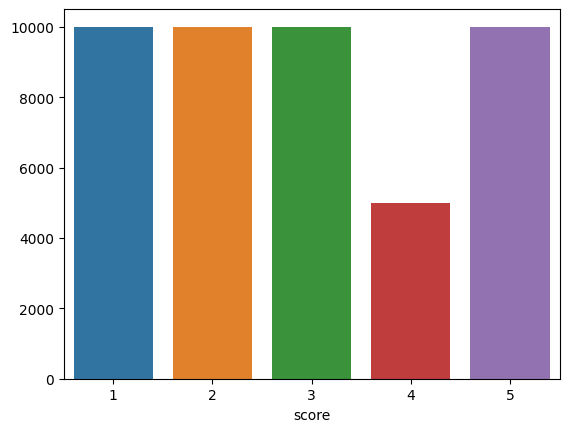

In [12]:
# Kelompokkan data berdasarkan kolom score
result = df.groupby(['score']).size()

# plot the result
sns.barplot(x = result.index, y = result.values)

In [13]:
# Inisialisasi daftar sentimen
sentimen = []

# Iterasi setiap baris dalam DataFrame
for index, row in df.iterrows():
    if row['score'] > 3 :
        sentimen.append(1)     # nilai 1 untuk score 4 - 5 
    elif row['score'] == 3:
        sentimen.append(0)     # nilai 0 untuk score 3
    else:
        sentimen.append(-1)    # nilai -1 untuk score 1 - 2
        
# Tambahkan kolom baru         
df['sentiment'] = sentimen
df.head()


,reviewId,userName,content,score,Year,Month,Day,sentiment
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,"Aplikasi sudah bagus, tapi penanganan tidak be...",1,2024,6,5,-1
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,Beberapa ada yang perlu direvisi dari sistemny...,1,2024,5,31,-1
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,"Mohon untuk menu swacam perbaiki lagi, karena ...",1,2024,6,24,-1
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,Fitur bayar Wifi Iconnect di Aplikasi sering e...,1,2024,7,1,-1
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,"Sangat buruk, aplikasi mau cek detail permohon...",1,2024,6,25,-1


In [14]:
# Menampilkan 5 data terbawah dengan kolom label baru
df.tail(5)

,reviewId,userName,content,score,Year,Month,Day,sentiment
44995,6872b578-b639-481c-9072-aa9edfaa57ca,Nanda Rokhman,Layanan online membantu memberikan nomor untuk...,5,2024,7,17,1
44996,618f24ce-d1fe-4bdb-994b-6c63f2de4488,Ahmad Saki,Bintang lima legend🔥memang sangat membantu apl...,5,2024,7,17,1
44997,ec4eb599-1edb-4241-8624-6b5069a0fdf1,Muhammad Filah Fadilah,"mantap, aplikasinya membantu",5,2024,7,17,1
44998,2c38e4ba-4a4c-4dd3-8c4f-e4469a54b2bd,family gaming,Cepat dan lancar kalau pelanggan melapor gangg...,5,2024,7,17,1
44999,81a1359a-2f98-4df1-9fb1-f15af0a8c10e,Fauzan Judo,Bagus,5,2024,7,17,1


<Axes: xlabel='sentiment'>

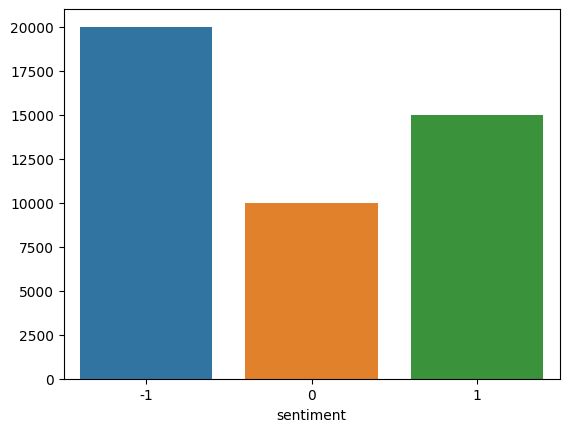

In [15]:
# Kelompook data berdasarkan sentiment
df_new = df[['Year', 'Month', 'sentiment']]

#df_new
result = df_new.groupby(['sentiment']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)

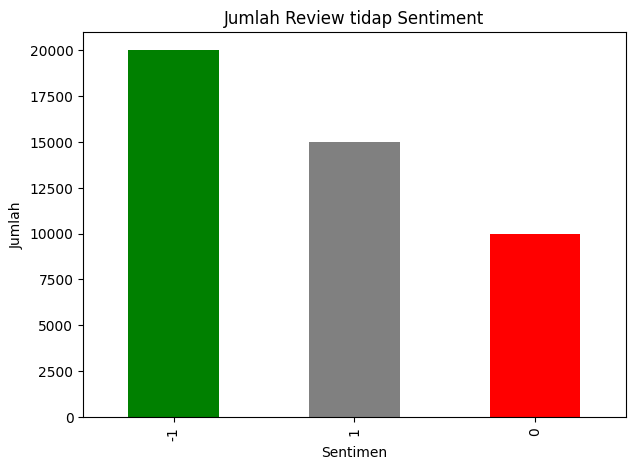

In [16]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df_new['sentiment'].value_counts().plot(kind='bar',color = color)
plt.title('Jumlah Review tidap Sentiment')
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.grid(False)
plt.show()

<Axes: xlabel='Year', ylabel='count'>

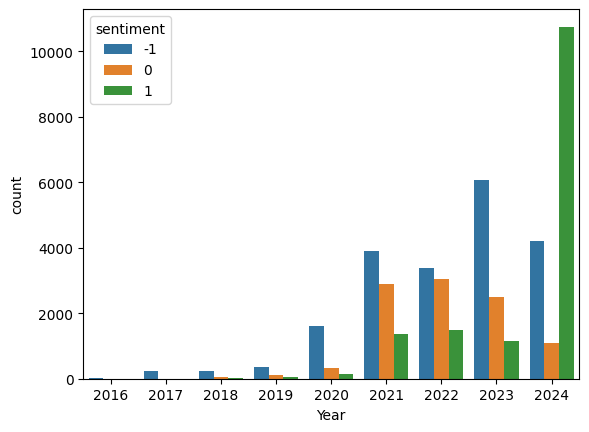

In [17]:
import seaborn as sns

# Buat plot untuk jumlah kemunculan data per-tahun
sns.countplot(data=df_new,x='Year',hue='sentiment')

In [18]:
# Kelompokkan data berdasarkan kolom 'Year' dan hitung jumlah entri di kolom 'Month'
df2 = df_new.groupby(['Year'])['Month'].count()
df2

Year
2016       28
2017      228
2018      296
2019      528
2020     2063
2021     8176
2022     7905
2023     9712
2024    16064
Name: Month, dtype: int64

In [19]:
# Kelompokkan data berdasarkan 2 kolom dan hitung jumlah kemunculan
df3 = df_new.groupby(['Year','sentiment'])['sentiment'].count()
df3

Year  sentiment
2016  -1              28
2017  -1             228
2018  -1             223
       0              50
       1              23
2019  -1             345
       0             118
       1              65
2020  -1            1596
       0             314
       1             153
2021  -1            3910
       0            2885
       1            1381
2022  -1            3368
       0            3059
       1            1478
2023  -1            6081
       0            2481
       1            1150
2024  -1            4221
       0            1093
       1           10750
Name: sentiment, dtype: int64

In [20]:
# Hitung jumlah sentiment
df['sentiment'].value_counts()


sentiment
-1    20000
 1    15000
 0    10000
Name: count, dtype: int64

# NLTK

Natural Languange ToolKit (NLTK) yakni "sebuah platform berbasis Python yang dikembangkan untuk memproses data text."

[Paper NLTK](https://sistemcerdas.mipa.ugm.ac.id/wp-content/uploads/sites/1297/2020/06/Pengenalan-NLTK-Bagian-1.pdf)

[Documentation NLTK](https://www.nltk.org/install.html)

In [21]:
!pip install nltk

In [22]:
import string
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocess Text

In [23]:
import pandas as pd
import re # modul re adalah regular expression 

def preprocess_text(text):
    # Menghapus URL
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE)
    
    # Mengubah teks jadi lower case
    text = text.lower()
    
    # Menghapus mention
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE)
    
    # Menghapus hashtag
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE)
    
    # Menghapus next karakter
    text = re.sub(r"'\w+", ' ', text)
    
    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Menghapus extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Terapkan fungsi preprocess_text ke kolom 'content'
df['content'] = df['content'].progress_apply(preprocess_text)

100%|██████████| 45000/45000 [00:01<00:00, 37109.68it/s]


In [24]:
# Mengukur waktu eksekusi dari 1 baris code
%time df['text_clean'] = df['content'].progress_apply(preprocess_text)
df['text_clean'] = df["text_clean"].astype(str).str.lower()

100%|██████████| 45000/45000 [00:01<00:00, 40449.04it/s]

CPU times: user 1.12 s, sys: 2.93 ms, total: 1.12 s
Wall time: 1.12 s


In [25]:
# Tampilkan DataFrame
df

,reviewId,userName,content,score,Year,Month,Day,sentiment,text_clean
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,aplikasi sudah bagus tapi penanganan tidak ber...,1,2024,6,5,-1,aplikasi sudah bagus tapi penanganan tidak ber...
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,beberapa ada yang perlu direvisi dari sistemny...,1,2024,5,31,-1,beberapa ada yang perlu direvisi dari sistemny...
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,mohon untuk menu swacam perbaiki lagi karena p...,1,2024,6,24,-1,mohon untuk menu swacam perbaiki lagi karena p...
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,fitur bayar wifi iconnect di aplikasi sering e...,1,2024,7,1,-1,fitur bayar wifi iconnect di aplikasi sering e...
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,sangat buruk aplikasi mau cek detail permohona...,1,2024,6,25,-1,sangat buruk aplikasi mau cek detail permohona...
...,...,...,...,...,...,...,...,...,...
44995,6872b578-b639-481c-9072-aa9edfaa57ca,Nanda Rokhman,layanan online membantu memberikan nomor untuk...,5,2024,7,17,1,layanan online membantu memberikan nomor untuk...
44996,618f24ce-d1fe-4bdb-994b-6c63f2de4488,Ahmad Saki,bintang lima legend memang sangat membantu apl...,5,2024,7,17,1,bintang lima legend memang sangat membantu apl...
44997,ec4eb599-1edb-4241-8624-6b5069a0fdf1,Muhammad Filah Fadilah,mantap aplikasinya membantu,5,2024,7,17,1,mantap aplikasinya membantu
44998,2c38e4ba-4a4c-4dd3-8c4f-e4469a54b2bd,family gaming,cepat dan lancar kalau pelanggan melapor gangg...,5,2024,7,17,1,cepat dan lancar kalau pelanggan melapor gangg...


In [26]:
# Import pustaka nltk dari modul corpus
import nltk.corpus
nltk.download('stopwords') # download stopwords
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Hapus kata - kata umum
stop = stopwords.words('indonesian')
df['text_StopWord'] = df['text_clean'].progress_apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head()

100%|██████████| 45000/45000 [00:06<00:00, 6800.03it/s] 


,reviewId,userName,content,score,Year,Month,Day,sentiment,text_clean,text_StopWord
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,aplikasi sudah bagus tapi penanganan tidak ber...,1,2024,6,5,-1,aplikasi sudah bagus tapi penanganan tidak ber...,aplikasi bagus penanganan berguna daerah lapor...
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,beberapa ada yang perlu direvisi dari sistemny...,1,2024,5,31,-1,beberapa ada yang perlu direvisi dari sistemny...,direvisi sistemnya sistem tdk diaplikasikan di...
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,mohon untuk menu swacam perbaiki lagi karena p...,1,2024,6,24,-1,mohon untuk menu swacam perbaiki lagi karena p...,mohon menu swacam perbaiki pending pengiriman ...
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,fitur bayar wifi iconnect di aplikasi sering e...,1,2024,7,1,-1,fitur bayar wifi iconnect di aplikasi sering e...,fitur bayar wifi iconnect aplikasi error bayar...
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,sangat buruk aplikasi mau cek detail permohona...,1,2024,6,25,-1,sangat buruk aplikasi mau cek detail permohona...,buruk aplikasi cek detail permohonan lemot pem...


In [28]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [29]:
# Melakukan tokenize menggunakan Regexp
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['text_tokens']=df['text_StopWord'].progress_apply(regexp.tokenize)
df.head()

100%|██████████| 45000/45000 [00:00<00:00, 109017.59it/s]


,reviewId,userName,content,score,Year,Month,Day,sentiment,text_clean,text_StopWord,text_tokens
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,aplikasi sudah bagus tapi penanganan tidak ber...,1,2024,6,5,-1,aplikasi sudah bagus tapi penanganan tidak ber...,aplikasi bagus penanganan berguna daerah lapor...,"[aplikasi, bagus, penanganan, berguna, daerah,..."
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,beberapa ada yang perlu direvisi dari sistemny...,1,2024,5,31,-1,beberapa ada yang perlu direvisi dari sistemny...,direvisi sistemnya sistem tdk diaplikasikan di...,"[direvisi, sistemnya, sistem, tdk, diaplikasik..."
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,mohon untuk menu swacam perbaiki lagi karena p...,1,2024,6,24,-1,mohon untuk menu swacam perbaiki lagi karena p...,mohon menu swacam perbaiki pending pengiriman ...,"[mohon, menu, swacam, perbaiki, pending, pengi..."
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,fitur bayar wifi iconnect di aplikasi sering e...,1,2024,7,1,-1,fitur bayar wifi iconnect di aplikasi sering e...,fitur bayar wifi iconnect aplikasi error bayar...,"[fitur, bayar, wifi, iconnect, aplikasi, error..."
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,sangat buruk aplikasi mau cek detail permohona...,1,2024,6,25,-1,sangat buruk aplikasi mau cek detail permohona...,buruk aplikasi cek detail permohonan lemot pem...,"[buruk, aplikasi, cek, detail, permohonan, lem..."


# Sastrawi

library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya 

[Reference Sastrawi](https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-a4fa52608ffe)

[Documentation 1](https://pypi.org/project/Sastrawi/)

[Documentation 2](https://github.com/har07/PySastrawi)

In [30]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [31]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [32]:
# Melakukan stemming dari tokens
df['text_stemmindo'] = df['text_tokens'].progress_apply(lambda x: [stemmer.stem(y) for y in x])


100%|██████████| 45000/45000 [30:53<00:00, 24.27it/s]


In [33]:
# Tampilkan DataFrame
df.head()

,reviewId,userName,content,score,Year,Month,Day,sentiment,text_clean,text_StopWord,text_tokens,text_stemmindo
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,aplikasi sudah bagus tapi penanganan tidak ber...,1,2024,6,5,-1,aplikasi sudah bagus tapi penanganan tidak ber...,aplikasi bagus penanganan berguna daerah lapor...,"[aplikasi, bagus, penanganan, berguna, daerah,...","[aplikasi, bagus, tangan, guna, daerah, lapor,..."
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,beberapa ada yang perlu direvisi dari sistemny...,1,2024,5,31,-1,beberapa ada yang perlu direvisi dari sistemny...,direvisi sistemnya sistem tdk diaplikasikan di...,"[direvisi, sistemnya, sistem, tdk, diaplikasik...","[revisi, sistem, sistem, tdk, aplikasi, seluru..."
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,mohon untuk menu swacam perbaiki lagi karena p...,1,2024,6,24,-1,mohon untuk menu swacam perbaiki lagi karena p...,mohon menu swacam perbaiki pending pengiriman ...,"[mohon, menu, swacam, perbaiki, pending, pengi...","[mohon, menu, swacam, baik, pending, kirim, wi..."
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,fitur bayar wifi iconnect di aplikasi sering e...,1,2024,7,1,-1,fitur bayar wifi iconnect di aplikasi sering e...,fitur bayar wifi iconnect aplikasi error bayar...,"[fitur, bayar, wifi, iconnect, aplikasi, error...","[fitur, bayar, wifi, iconnect, aplikasi, error..."
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,sangat buruk aplikasi mau cek detail permohona...,1,2024,6,25,-1,sangat buruk aplikasi mau cek detail permohona...,buruk aplikasi cek detail permohonan lemot pem...,"[buruk, aplikasi, cek, detail, permohonan, lem...","[buruk, aplikasi, cek, detail, mohon, lot, pas..."


In [34]:
# Melakukan string dari stemming
df['text_string'] = df['text_stemmindo'].progress_apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df

100%|██████████| 45000/45000 [00:00<00:00, 254559.20it/s]


,reviewId,userName,content,score,Year,Month,Day,sentiment,text_clean,text_StopWord,text_tokens,text_stemmindo,text_string
0,18241eb4-f2ce-4e96-a2dd-5cf9f53feea4,Pengguna Google,aplikasi sudah bagus tapi penanganan tidak ber...,1,2024,6,5,-1,aplikasi sudah bagus tapi penanganan tidak ber...,aplikasi bagus penanganan berguna daerah lapor...,"[aplikasi, bagus, penanganan, berguna, daerah,...","[aplikasi, bagus, tangan, guna, daerah, lapor,...",aplikasi bagus tangan guna daerah lapor kali k...
1,61f2257a-9a1f-4b18-8c80-9122c9cd1dab,Pengguna Google,beberapa ada yang perlu direvisi dari sistemny...,1,2024,5,31,-1,beberapa ada yang perlu direvisi dari sistemny...,direvisi sistemnya sistem tdk diaplikasikan di...,"[direvisi, sistemnya, sistem, tdk, diaplikasik...","[revisi, sistem, sistem, tdk, aplikasi, seluru...",revisi sistem sistem aplikasi seluruh daerah i...
2,67ec182c-8be4-477c-9b02-83dd71164ace,Pengguna Google,mohon untuk menu swacam perbaiki lagi karena p...,1,2024,6,24,-1,mohon untuk menu swacam perbaiki lagi karena p...,mohon menu swacam perbaiki pending pengiriman ...,"[mohon, menu, swacam, perbaiki, pending, pengi...","[mohon, menu, swacam, baik, pending, kirim, wi...",mohon menu swacam baik pending kirim wifi jari...
3,ef77981b-2fa6-4882-a6dc-875696cd3cb8,Pengguna Google,fitur bayar wifi iconnect di aplikasi sering e...,1,2024,7,1,-1,fitur bayar wifi iconnect di aplikasi sering e...,fitur bayar wifi iconnect aplikasi error bayar...,"[fitur, bayar, wifi, iconnect, aplikasi, error...","[fitur, bayar, wifi, iconnect, aplikasi, error...",fitur bayar wifi iconnect aplikasi error bayar...
4,ea5ac48c-4305-42a7-a8be-fd0fb4eba9ef,Pengguna Google,sangat buruk aplikasi mau cek detail permohona...,1,2024,6,25,-1,sangat buruk aplikasi mau cek detail permohona...,buruk aplikasi cek detail permohonan lemot pem...,"[buruk, aplikasi, cek, detail, permohonan, lem...","[buruk, aplikasi, cek, detail, mohon, lot, pas...",buruk aplikasi detail mohon pasang sesuai baya...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,6872b578-b639-481c-9072-aa9edfaa57ca,Nanda Rokhman,layanan online membantu memberikan nomor untuk...,5,2024,7,17,1,layanan online membantu memberikan nomor untuk...,layanan online membantu nomor perbaikan,"[layanan, online, membantu, nomor, perbaikan]","[layan, online, bantu, nomor, baik]",layan online bantu nomor baik
44996,618f24ce-d1fe-4bdb-994b-6c63f2de4488,Ahmad Saki,bintang lima legend memang sangat membantu apl...,5,2024,7,17,1,bintang lima legend memang sangat membantu apl...,bintang legend membantu aplikasi nya petugas l...,"[bintang, legend, membantu, aplikasi, nya, pet...","[bintang, legend, bantu, aplikasi, nya, tugas,...",bintang legend bantu aplikasi tugas lngsung ru...
44997,ec4eb599-1edb-4241-8624-6b5069a0fdf1,Muhammad Filah Fadilah,mantap aplikasinya membantu,5,2024,7,17,1,mantap aplikasinya membantu,mantap aplikasinya membantu,"[mantap, aplikasinya, membantu]","[mantap, aplikasi, bantu]",mantap aplikasi bantu
44998,2c38e4ba-4a4c-4dd3-8c4f-e4469a54b2bd,family gaming,cepat dan lancar kalau pelanggan melapor gangg...,5,2024,7,17,1,cepat dan lancar kalau pelanggan melapor gangg...,cepat lancar pelanggan melapor gangguan mati l...,"[cepat, lancar, pelanggan, melapor, gangguan, ...","[cepat, lancar, langgan, lapor, ganggu, mati, ...",cepat lancar langgan lapor ganggu mati lampu


In [35]:
# Simpan hasilnya
df.to_csv('hasil_Stemmed_PLN.csv',index= False) #simpan hasil text preprocessing ke file csv

In [36]:
# Kelompokkan data dalam DataFrame pada kolom "Month" & "Day"
df.groupby(['Month','Day'])
print(df.groupby(['Month','Day']).groups)

{(1, 1): [1058, 1313, 1645, 1665, 1757, 2603, 2819, 3196, 3213, 3487, 3564, 3588, 4538, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 10267, 10357, 10524, 10736, 11311, 12280, 12687, 13744, 15446, 16534, 17673, 17674, 17675, 17676, 17677, 19661, 20361, 20370, 20675, 20687, 20789, 20997, 21162, 21928, 21993, 22082, 22084, 22089, 22176, 22305, 22760, 22879, 22954, 22969, 23365, 23375, 23608, 24129, 24577, 25575, 25576, 25577, 25578, 25579, 25580, 25581, 26979, 26980, 26981, 26982, 26983, 26984, 28733, 28734, 28735, 28736, 28737, 28738, 28739, 28740, 30244, 30288, 30549, 30655, 31055, 31456, 32044, 32421, 33222, 33465, 33540, 33667, 33671, 33822, 34764, ...], (1, 2): [394, 1166, 1246, 1502, 1811, 1828, 2400, 2651, 2762, 2982, 3831, 4423, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 10286, 10612, 10655, 10663, 11359, 11598, 11864, 11935, 12194, 12499, 13188, 13258, 13443, 13737, 13945, 14506, 149

In [37]:
# Tampilkan Text String
df['text_string']

0        aplikasi bagus tangan guna daerah lapor kali k...
1        revisi sistem sistem aplikasi seluruh daerah i...
2        mohon menu swacam baik pending kirim wifi jari...
3        fitur bayar wifi iconnect aplikasi error bayar...
4        buruk aplikasi detail mohon pasang sesuai baya...
                               ...                        
44995                        layan online bantu nomor baik
44996    bintang legend bantu aplikasi tugas lngsung ru...
44997                                mantap aplikasi bantu
44998         cepat lancar langgan lapor ganggu mati lampu
44999                                                bagus
Name: text_string, Length: 45000, dtype: object

# Import Libraries

In [38]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer

from tqdm import tqdm

from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import MultinomialNB
# from xgboost import XGBClassifier
# from sklearn.svm import SVC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  

# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings   

warnings.filterwarnings('ignore')
%matplotlib inline

# Separate X data and Y data

In [39]:
X = df['text_string']
y = df['sentiment']

In [40]:
X

0        aplikasi bagus tangan guna daerah lapor kali k...
1        revisi sistem sistem aplikasi seluruh daerah i...
2        mohon menu swacam baik pending kirim wifi jari...
3        fitur bayar wifi iconnect aplikasi error bayar...
4        buruk aplikasi detail mohon pasang sesuai baya...
                               ...                        
44995                        layan online bantu nomor baik
44996    bintang legend bantu aplikasi tugas lngsung ru...
44997                                mantap aplikasi bantu
44998         cepat lancar langgan lapor ganggu mati lampu
44999                                                bagus
Name: text_string, Length: 45000, dtype: object

In [41]:
y

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: sentiment, Length: 45000, dtype: int64

# TF-IDF

Dipecah menjadi dua bagian TF (term frequency) dan IDF (inverse document frequency). 
TF (term frequency) yakni bekerja dengan melihat frekuensi istilah tertentu yang Anda perhatikan relatif terhadap dokumen. Kemudian apa itu IDF (inverse document frequency) ? IDF sendiri ialah Frekuensi dokumen terbalik melihat seberapa umum (atau tidak umum) sebuah kata di antara korpus. IDF dihitung sebagai berikut, di mana t adalah istilah (kata) yang ingin kita ukur keumumannya dan N adalah jumlah dokumen (d) dalam korpus (D). Penyebutnya hanyalah jumlah dokumen di mana istilah, t , muncul. 

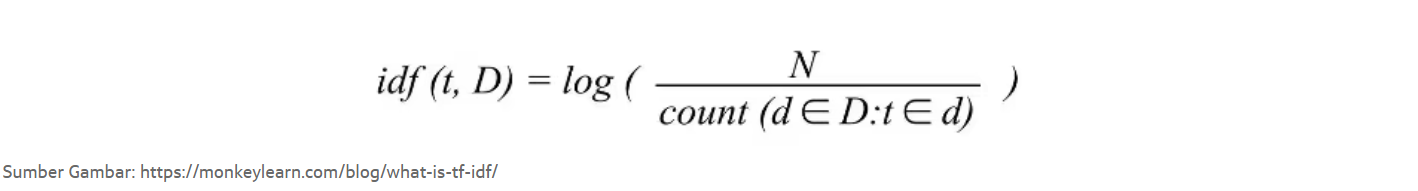

Berikut ketika digunakan dalam Sckit-Learn

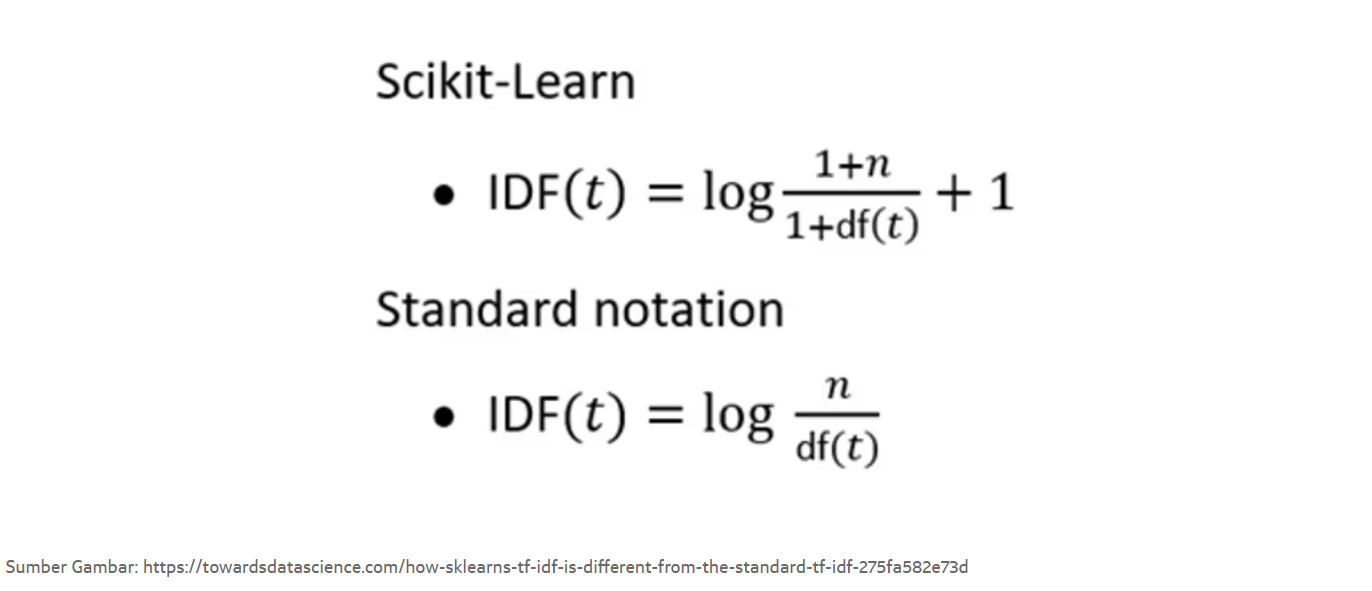

[Reference](https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/)

In [42]:
# Inisialisasi dan fit TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan fit_transform pada kolom text_string
tfidf_matrix = tfidf_vectorizer.fit_transform(tqdm(df['text_string'], desc="Menghitung TF-IDF"))

# Mengambil daftar fitur (kata-kata)
terms = tfidf_vectorizer.get_feature_names_out()

# Menghitung IDF
idf = np.log(tfidf_matrix.shape[0] / (np.count_nonzero(tfidf_matrix.toarray(), axis=0) + 1))

# Membuat DataFrame untuk menyimpan term dan IDF
tfidf_df = pd.DataFrame({'term': terms, 'idf': idf})

# Tambahkan kolom TF (term frequency) untuk setiap dokumen
for i, doc in enumerate(tqdm(df['text_string'], desc="Menambahkan kolom TF")):
    tf = tfidf_matrix[i].toarray().flatten()
    tfidf_df[f'tf_{i}'] = tf

Menambahkan kolom TF: 100%|██████████| 45000/45000 [05:43<00:00, 130.99it/s]


In [43]:
tfidf_df

,term,idf,tf_0,tf_1,tf_2,tf_3,tf_4,tf_5,tf_6,tf_7,...,tf_44990,tf_44991,tf_44992,tf_44993,tf_44994,tf_44995,tf_44996,tf_44997,tf_44998,tf_44999
0,0000,10.021271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000000000000000,9.615805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001,10.021271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000rb,9.615805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000va,10.021271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15936,zoom,8.006368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15937,zoonk,10.021271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15938,zulaini,10.021271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15939,zulfikar,10.021271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
from joblib import dump

# Simpan objek TfidfVectorizer yang telah di-fit
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [45]:
# Mengakses vocabulary
vocab = tfidf_vectorizer.vocabulary_

# Menampilkan vocabulary
print(vocab)

{'aplikasi': 1114, 'bagus': 1426, 'tangan': 14159, 'guna': 5025, 'daerah': 3096, 'lapor': 7552, 'kali': 6199, 'teknisi': 14312, 'respon': 12177, 'cuman': 3057, 'indikator': 5579, 'kuning': 7283, 'nyala': 10125, 'periksa': 11122, 'muncul': 9393, 'hari': 5193, 'kerja': 6675, 'revisi': 12232, 'sistem': 13367, 'seluruh': 12954, 'indonesia': 5587, 'paksa': 10487, 'pakai': 10471, 'semua': 13018, 'dikalteng': 3564, 'jangkau': 5869, 'luas': 7984, 'pelosok': 10820, 'akses': 741, 'jalan': 5838, 'dikota2': 3591, 'moga': 9213, 'sedia': 12800, 'wadah': 15648, 'opini': 10338, 'ulas': 15322, 'layan': 7593, 'langgan': 7492, 'mohon': 9219, 'menu': 8854, 'swacam': 13966, 'baik': 1451, 'pending': 10969, 'kirim': 6821, 'wifi': 15753, 'jaring': 5888, 'seluler': 12949, 'target': 14229, 'capai': 2676, 'kena': 6586, 'imbas': 5537, 'sama': 12478, 'terima': 14502, 'kasih': 6327, 'fitur': 4489, 'bayar': 1708, 'iconnect': 5457, 'error': 4315, 'email': 4214, 'detail': 3355, 'tagih': 14048, 'gimana': 4879, 'wifinya

In [46]:
vocab

{'aplikasi': 1114,
 'bagus': 1426,
 'tangan': 14159,
 'guna': 5025,
 'daerah': 3096,
 'lapor': 7552,
 'kali': 6199,
 'teknisi': 14312,
 'respon': 12177,
 'cuman': 3057,
 'indikator': 5579,
 'kuning': 7283,
 'nyala': 10125,
 'periksa': 11122,
 'muncul': 9393,
 'hari': 5193,
 'kerja': 6675,
 'revisi': 12232,
 'sistem': 13367,
 'seluruh': 12954,
 'indonesia': 5587,
 'paksa': 10487,
 'pakai': 10471,
 'semua': 13018,
 'dikalteng': 3564,
 'jangkau': 5869,
 'luas': 7984,
 'pelosok': 10820,
 'akses': 741,
 'jalan': 5838,
 'dikota2': 3591,
 'moga': 9213,
 'sedia': 12800,
 'wadah': 15648,
 'opini': 10338,
 'ulas': 15322,
 'layan': 7593,
 'langgan': 7492,
 'mohon': 9219,
 'menu': 8854,
 'swacam': 13966,
 'baik': 1451,
 'pending': 10969,
 'kirim': 6821,
 'wifi': 15753,
 'jaring': 5888,
 'seluler': 12949,
 'target': 14229,
 'capai': 2676,
 'kena': 6586,
 'imbas': 5537,
 'sama': 12478,
 'terima': 14502,
 'kasih': 6327,
 'fitur': 4489,
 'bayar': 1708,
 'iconnect': 5457,
 'error': 4315,
 'email': 4214

In [47]:
# Menampilkan beberapa entri pertama dari kosakata
for word, index in list(vocab.items())[:10]:
    print(f'Kata: {word}, Indeks: {index}')


Kata: aplikasi, Indeks: 1114
Kata: bagus, Indeks: 1426
Kata: tangan, Indeks: 14159
Kata: guna, Indeks: 5025
Kata: daerah, Indeks: 3096
Kata: lapor, Indeks: 7552
Kata: kali, Indeks: 6199
Kata: teknisi, Indeks: 14312
Kata: respon, Indeks: 12177
Kata: cuman, Indeks: 3057


# SMOTE to Handling Imbalanced

In [48]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi numerik
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Inisialisasi SMOTE
smote = SMOTE()

# Resampling dataset untuk menangani imbalanced data
X_sm, y_sm = smote.fit_resample(X_tfidf, y)

# Split Dataset

In [49]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=40)

In [50]:
print(f"Jumlah X_train: {X_train.shape[0]}")
print(f"Jumlah X_test: {X_test.shape[0]}")
print(f"Jumlah y_train: {y_train.shape[0]}")
print(f"Jumlah y_test: {y_test.shape[0]}")


Jumlah X_train: 48000
Jumlah X_test: 12000
Jumlah y_train: 48000
Jumlah y_test: 12000


# Random Forest Classifier

Algoritma machine learning berbasis ensemble yang menggunakan kombinasi dari decision tree untuk meningkatkan akurasi prediksi dan mengurangi overfitting.

[Reference](https://dibimbing.id/blog/detail/apa-itu-random-forest-pengertian-cara-kerja-contohnya)

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [51]:
algorithm = RandomForestClassifier()
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih

In [52]:
RandomForestClassifier()

RandomForestClassifier()

In [53]:
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [54]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([-1,  1, -1, ...,  0,  1,  0])

In [55]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

1133    -1
44893    1
4191    -1
27979    0
57668    1
        ..
44240    1
32718    1
23073    0
39548    1
25154    0
Name: sentiment, Length: 12000, dtype: int64

# Confusion Matrix

In [56]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 10129
Jumlah prediksi salah	: 1871
Akurasi pengujian	: 84.40833333333333 %


In [57]:
matrik = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', matrik)

Confusion matrix:
 [[3421  365  180]
 [ 262 3387  291]
 [ 301  472 3321]]


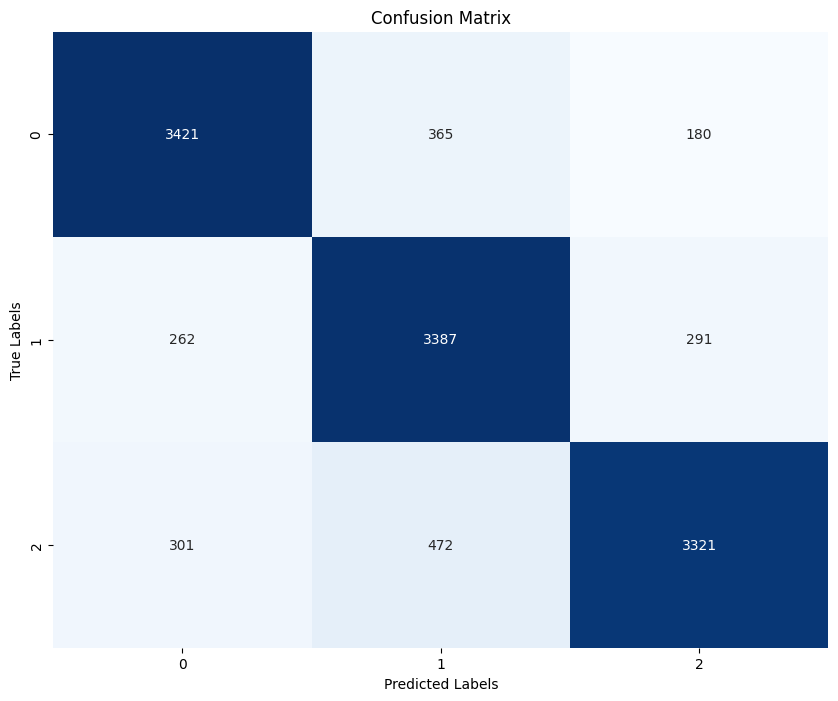

In [58]:
# Misalkan y_test adalah label sebenarnya dan model_pred adalah prediksi model
matrik = confusion_matrix(y_test, model_pred)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report

In [59]:
print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

          -1       0.86      0.86      0.86      3966
           0       0.80      0.86      0.83      3940
           1       0.88      0.81      0.84      4094

    accuracy                           0.84     12000
   macro avg       0.85      0.84      0.84     12000
weighted avg       0.85      0.84      0.84     12000



# Test Model

In [60]:
from joblib import load
from sklearn.feature_extraction.text import TfidfVectorizer

# Muat model yang telah disimpan
model = load('model_1.joblib')

# Muat TF-IDF Vectorizer yang telah disimpan
vectorizer = load('tfidf_vectorizer.joblib')

# Tetapkan input teks secara manual
test_input = "APLIKASI YANG BAGUS, tetap semangat & terus berinovasi !!!!!"

# Preprocess text
test_input_preprocessed = preprocess_text(test_input)

# Tampilkan hasil preprocessing
print(f'Teks setelah preprocessing: {test_input_preprocessed}')

# Transformasi input teks yang telah dipreprocessing menjadi fitur
test_input_transformed = vectorizer.transform([test_input_preprocessed])

# Buat prediksi
prediksi = model.predict(test_input_transformed)

# Ambil hasil prediksi
hasil_prediksi = prediksi[0]

# Map hasil prediksi ke label sentimen menggunakan if-else
if hasil_prediksi == -1:
    sentimen = 'Negatif'
elif hasil_prediksi == 0:
    sentimen = 'Netral'
elif hasil_prediksi == 1:
    sentimen = 'Positif'
else:
    sentimen = 'Label tidak dikenali'

# Cetak hasil sentimen
print(f'Hasil prediksi: {sentimen}')


Teks setelah preprocessing: aplikasi yang bagus tetap semangat terus berinovasi
Hasil prediksi: Positif


In [61]:
# Simpan hasil ke file
with open('hasil_prediksi.txt', 'w') as file:
    file.write(f'Teks asli: {test_input}\n')
    file.write(f'Teks setelah preprocessing: {test_input_preprocessed}\n')
    file.write(f'Hasil sentimen: {sentimen}\n')

# Install WordCloud

Teknik untuk melakukan visualisasi pada DataFrame

[Reference WordCloud](https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b)

[Documentation](https://pypi.org/project/wordcloud/)

In [62]:
!pip install wordcloud

In [63]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [64]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2024-08-09 07:29:19--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: 'cloud.jpg'

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.006s  

2024-08-09 07:29:19 (5.14 MB/s) - 'cloud.jpg' saved [34396/34396]



In [65]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

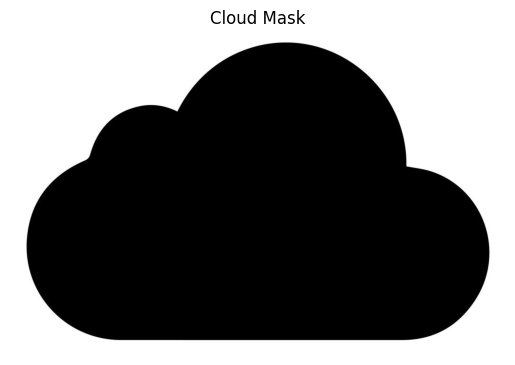

In [66]:
import cv2
import matplotlib.pyplot as plt

# Misalnya, ini adalah masking kamu
cloud_mask = cv2.imread('/kaggle/working/cloud.jpg', cv2.IMREAD_GRAYSCALE)

# Tampilkan masking menggunakan matplotlib
plt.imshow(cloud_mask, cmap='gray')
plt.title('Cloud Mask')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()


# WordCloud for Positive Sentiment

In [67]:
df_p=df[df['sentiment']==1]

all_words_lem = ' '.join([word for word in df_p['text_string']])

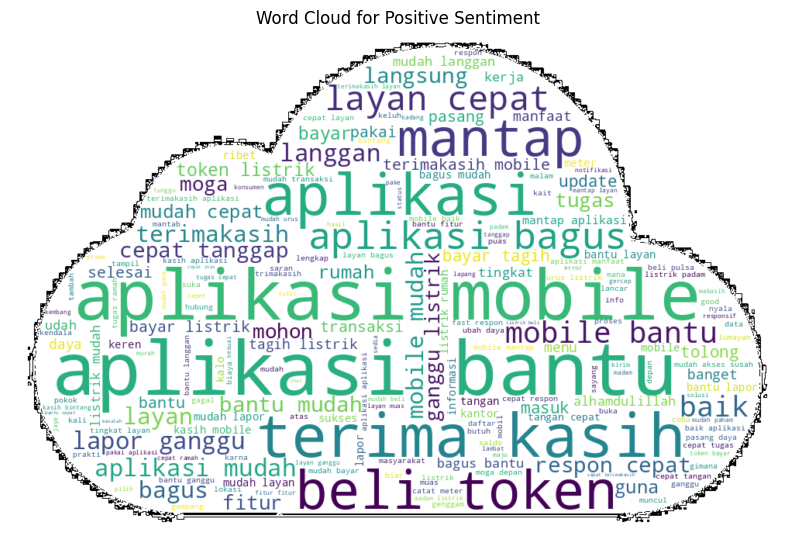

In [68]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

# WordCloud for Neutral Sentiment

In [69]:
# Filter data frame untuk sentiment netral
df_n = df[df['sentiment'] == 0]

# Gabungkan semua kata dalam kolom 'text_string' yang memiliki sentimen netral
all_words_lem = ' '.join([word for word in df_n['text_string']])

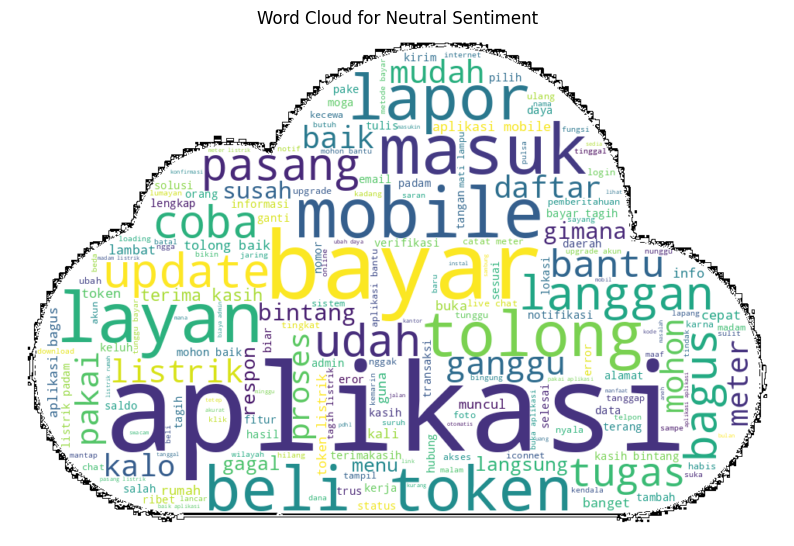

In [70]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

# WordCloud for Negative Sentiment

In [71]:
# Filter data frame untuk sentiment negatif
df_n = df[df['sentiment'] == -1]

# Gabungkan semua kata dalam kolom 'text_string' yang memiliki sentimen negatif
all_words_lem = ' '.join([word for word in df_n['text_string']])

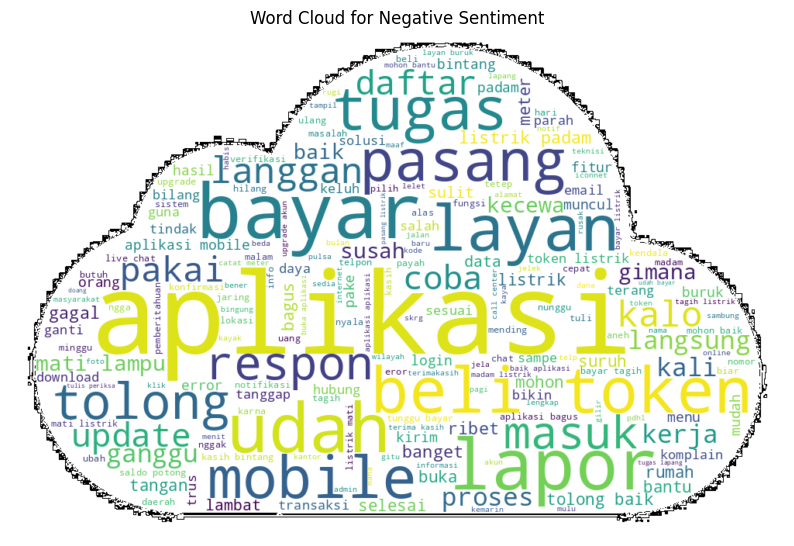

In [72]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

# Words That Appear The Most

In [73]:
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
fd.most_common(3)

[('aplikasi', 8823), ('bayar', 3980), ('listrik', 3929)]

In [75]:
fd.tabulate(3)

aplikasi    bayar  listrik 
    8823     3980     3929 


In [76]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

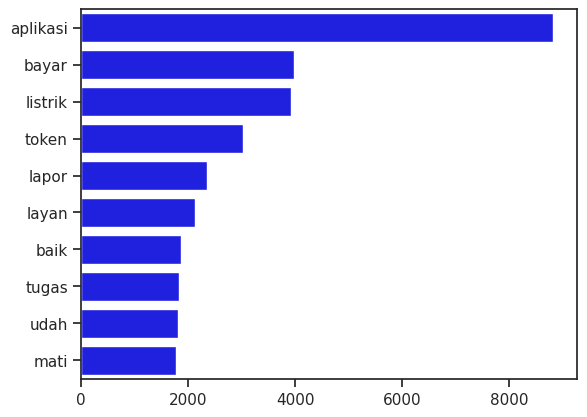

In [77]:
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');